<a href="https://colab.research.google.com/github/AT200210/Data_Science/blob/main/ML/Boosting_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. AdaBoost (Adaptive boosting)
   Train's sequentially the weak learner
   Each learner is trained on data, giving more weight to previously misclassified samples.
   Weighted sum of all weak learner's prediction

2. Gradient Boosting:
   Agenda is to minimize loss function.
   each new kearner fits the residual errors of the previous model

3. XGBoost:
   Optimized version of gradient boosting because it includes regularization to reduce overfitting.
   Used parallelization, tree pruning and other tricks

4. CatBoost (Categorical Boosting)

5. LightGBM
   Uses leaf-wise growth instead of evel wise.

   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install xgboost

In [3]:
!pip install lightgbm

In [4]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.9 MB/s eta 0:00:00


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [6]:
data=load_breast_cancer()

In [7]:
X=data.data
y=data.target

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [9]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
model_ada=AdaBoostClassifier(n_estimators=100,random_state=42)
model_ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [11]:
y_pred_ada=model_ada.predict(X_test)

In [12]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [13]:
model_gb=GradientBoostingClassifier(n_estimators=100,random_state=42)
model_gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [14]:
y_pred_gb=model_gb.predict(X_test)
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
model_xgb=XGBClassifier(n_estimators=100,random_state=42)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [16]:
y_pred_xgb=model_xgb.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
lightab=LGBMClassifier(n_estimators=100,random_state=42)
lightab.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=42)

In [18]:
y_pred_lightab=lightab.predict(X_test)
print(classification_report(y_test,y_pred_lightab))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [19]:
model_cat=CatBoostClassifier(n_estimators=100,random_state=42,verbose=0)
model_cat.fit(X_train,y_train)

In [20]:
y_pred_cat=model_cat.predict(X_test)
print(classification_report(y_test,y_pred_cat))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [23]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear',probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [25]:
boosted_svm=AdaBoostClassifier(estimator=svm_model,n_estimators=100,random_state=42)
boosted_svm.fit(X_train,y_train)

AdaBoostClassifier(estimator=SVC(kernel='linear', probability=True),
                   n_estimators=100, random_state=42)

In [26]:
boosted_svm_pred=boosted_svm.predict(X_test)
print(classification_report(y_test,boosted_svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Not all ML models (like SVM, KNN, or Naive Bayes) are suitable or supported directly.



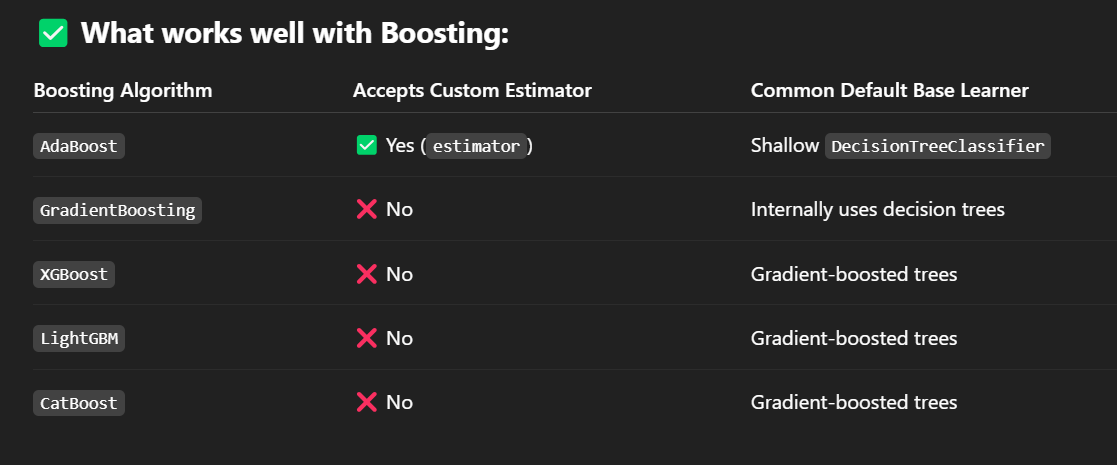